In [6]:
import base64
import pandas as pd
import numpy as np
import os
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from openai import OpenAI
import secret

## Condition 1: continuous features without images

In [9]:
# Set the API key
client = OpenAI(
  api_key=secret.api_key,
)

# Function to encode the image to base64
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

def query_model(image_path, prompt_text):
    
    # Create the content list with text and image in one message
    # Append the main image
    messages = [
        {"role": "user", "content": prompt_text},
        {"role": "user", "content":[
            {"type": "text", "text": "This is the rock you will label."},
            {"type": "image_url", "image_url":{"url":f"data:image/jpeg;base64,{encode_image(image_path)}"}}
        ]}]

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=messages,
        max_tokens=5,
        temperature=0
    )
    
    return response.choices[0].message.content

def process_images(prompt_text, csv_file_path, image_directory, limit=0):
    os.makedirs(os.path.dirname(csv_file_path), exist_ok=True)
    try:
        df_responses = pd.read_csv(csv_file_path)
    except FileNotFoundError:
        df_responses = pd.DataFrame(columns=['Image', 'Response'])

    image_paths = [os.path.join(subdir, file) for subdir, dirs, files in os.walk(image_directory) for file in files if file.endswith(".jpg")]
    image_paths.sort()

    if limit > 1:
        image_paths = image_paths[:limit]

    for image_path in tqdm(image_paths, desc="Processing images"):
        row_label = os.path.basename(image_path)

        if row_label not in df_responses['Image'].values:
            #print(image_path)
            response = query_model(image_path, prompt_text)
            try:
                parsed_response = response
            except KeyError:
                print(response)
                break

            row_data = {'Image': row_label, 'Response': parsed_response}
            temp_df = pd.DataFrame([row_data])
            df_responses = pd.concat([df_responses, temp_df], ignore_index=True)

            # Save progress after each image is processed
            df_responses.to_csv(csv_file_path, index=False)

    print(f"Processing complete. Responses saved to {csv_file_path}")

### lightness

In [10]:
prompt_text = (
'In this trial, you will rate a rock on its darkness/lightness of color. A dark rock should receive a rating of 1.00 or 2.00. A light rock should receive a rating of 8.00 or 9.00. A rock that is medium in darkness/lightness should receive a medium rating. In some cases, parts of the rock may be light and other parts may be dark. In those cases, do your best to rate the "average" lightness of the entire rock. Please try to use the full scale from 1.00 (darkest) through 9.00 (lightest) in making your rating. Please respond ONLY with a continuous numeric decimal value, allowing for any decimal places within the range of 1.00 to 9.00. Precision is key, and values should NOT be constrained to 0.05 increments. Your response can include any decimal point to the hundredths place within the specified range.'
)

process_images(prompt_text=prompt_text, csv_file_path="gpt4o_data_no_anchors_RGB/model_lightness_no_anchors.csv", image_directory='Images_RGB', limit=0)

Processing images:   0%|          | 0/360 [00:00<?, ?it/s]

Processing complete. Responses saved to gpt4o_data_no_anchors_RGB/model_lightness_no_anchors.csv


### grain size

In [ ]:
prompt_text = (
"In this trial, you will rate a rock on its average grain size. Rocks with no visible grain should receive a rating of 1.00 or 2.00. Rocks with an extremely coarse and fragmented grain should receive a rating of 8.00 or 9.00. Rocks with a medium grain should receive medium ratings. In some cases, parts of the rock may have a fine grain and other parts may have a coarse grain. In those cases, do your best to rate the 'average' grain size of the entire rock. Please try to use the full scale from 1.00 (no visible grain) through 9.00 (very coarse grain) in making your rating. Please respond ONLY with a continuous numeric decimal value, allowing for any decimal places within the range of 1.00 to 9.00. Precision is key, and values should NOT be constrained to 0.05 increments. Your response can include any decimal point to the hundredths place within the specified range. DO NOT RESPOND WITH 'I'm sorry...'")

process_images(prompt_text=prompt_text,  csv_file_path="gpt4o_data_no_anchors_RGB/model_grain_size_no_anchors.csv", image_directory='Images_RGB', limit=0)

### roughness

In [ ]:
prompt_text = (
'In this trial, you will rate a rock on how smooth versus rough it appears to be. Rocks that appear to be very smooth should receive a rating of 1.00 or 2.00. Rocks that appear to be very rough should receive a rating of 8.00 or 9.00. Rocks that are medium in their smoothness/roughness should receive medium ratings. In some cases, parts of a rock may be smooth and other parts may be rough. In those cases, do your best to rate the "average" roughness of the entire rock. Please try to use the full scale from 1.00 (smoothest) through 9.00 (roughest) in making your rating. Please respond ONLY with a continuous numeric decimal value, allowing for any decimal places within the range of 1.00 to 9.00. Precision is key, and values should NOT be constrained to 0.05 increments. Your response can include any decimal point to the hundredths place within the specified range.'
)

process_images(prompt_text=prompt_text, csv_file_path="gpt4o_data_no_anchors_RGB/model_roughness_no_anchors.csv", image_directory='Images_RGB', limit=0)

### shininess

In [ ]:
prompt_text = (
'An object is "shiny" if it reflects light and is glossy. Note that dark-colored objects can still be shiny. In this trial, you will rate a rock on how dull versus shiny it appears to be. Rocks that appear to be very dull should receive a rating of 1.00 or 2.00. Rocks that appear to be very shiny and glossy should receive a rating of 8.00 or 9.00. Rocks that are medium in their dullness/shininess should receive medium ratings. In some cases, parts of a rock may be dull and other parts may be shiny. In those cases, do your best to rate the "average" shininess of the entire rock. Please try to use the full scale from 1.00 (dullest) through 9.00 (shiniest) in making your rating. Please respond ONLY with a continuous numeric decimal value, allowing for any decimal places within the range of 1.00 to 9.00. Precision is key, and values should NOT be constrained to 0.05 increments. Your response can include any decimal point to the hundredths place within the specified range.'
)

process_images(prompt_text=prompt_text, csv_file_path="gpt4o_data_no_anchors_RGB/model_shininess_no_anchors.csv", image_directory='Images_RGB', limit=0)

### organization

In [ ]:
prompt_text = (
'Some rocks have components that are very regular and organized, such as systematic layers, bands, or grains. Other rocks seem very disorganized, such as those with fragments that are glued together in haphazard fashion. In this trial, you will rate a rock on how disorganized versus organized it appears to be. Rocks that are very disorganized should receive a rating of 1.00 or 2.00. Rocks that are very organized should receive a rating of 8.00 or 9.00. Rocks that are medium in their organization, or that have no visible texture to rate, should receive medium ratings. Please try to use the full scale from 1.00 (most disorganized) through 9.00 (most organized) in making your rating. Please respond ONLY with a continuous numeric decimal value, allowing for any decimal places within the range of 1.00 to 9.00. Precision is key, and values should NOT be constrained to 0.05 increments. Your response can include any decimal point to the hundredths place within the specified range.'
)

process_images(prompt_text=prompt_text, csv_file_path="gpt4o_data_no_anchors_RGB/model_organization_no_anchors.csv", image_directory='Images_RGB', limit=0)

### chromaticity

In [ ]:
prompt_text = (
'In this trial, you will rate a rock in terms of whether it has no color, cool color, or warm color. Rocks with no color (absolute black, gray or white) should receive a rating of 1.00 or 2.00. Rocks with cool colors (blue, blue/green, and green) should receive medium ratings (4.00, 5.00, or 6.00). Rocks with very warm colors (yellow, orange, red) should receive ratings of 8.00 or 9.00. Please try to use the full scale from 1.00 (no color) through 9.00 (warmest color) in making your rating. Please respond ONLY with a continuous numeric decimal value, allowing for any decimal places within the range of 1.00 to 9.00. Precision is key, and values should NOT be constrained to 0.05 increments. Your response can include any decimal point to the hundredths place within the specified range.'
)

process_images(prompt_text=prompt_text, csv_file_path="gpt4o_data_no_anchors_RGB/model_chromaticity_no_anchors.csv", image_directory='Images_RGB', limit=0)

### red/green hue

In [ ]:
prompt_text = (
"In this experiment, you will be presented with a picture of a rock. We would like you to rate the rock picture on a red-green contrast. Rocks that are most strongly red should receive ratings of 1.00 or 2.00. Rocks that are most strongly green should receive ratings of 8.00 or 9.00. Neutral rocks (black or white) that are absent of color should receive ratings of 5.00. For the remaining rocks, just decide whether the main color tends to be closer to red versus green. For example, most would agree that orange is closer to red than to green, so you might give orange rocks ratings of 2.00, 3.00, or 4.00. Likewise, most would agree that blue is closer to green than to red, so you might give blue rocks ratings of 6.00, 7.00, or 8.00. Please try to use the full scale from 1.00 to 9.00 in making your rating. Please respond ONLY with a continuous numeric decimal value, allowing for any decimal places within the range of 1.00 to 9.00. Precision is key, and values should NOT be constrained to 0.05 increments. Your response can include any decimal point to the hundredths place within the specified range. DO NOT RESPOND WITH 'I'm sorry...'"
)

process_images(prompt_text=prompt_text, csv_file_path="gpt4o_data_no_anchors_RGB/model_red_green_no_anchors.csv", image_directory='Images_RGB', limit=0)

### porphyritic texture

In [13]:
prompt_text = (
"In this experiment you will be presented with a picture of a rock. We are interested in your judgments about a very specific property of some of the rocks -- Certain kinds of rocks contain small fragments or pebbles that are glued into a separate background texture. THESE SMALL FRAGMENTS OR PEBBLES ARE SEPARATE FROM THE REST OF THE ROCK'S BACKGROUND ITSELF. We want you to rate each rock picture for this property. Rocks with no small fragments or pebbles glued into their separate background should receive a rating of 1.00 or 2.00. Rocks that definitely have small fragments or pebbles glued into their separate background should receive a rating of 8.00 or 9.00. Many rocks may be unclear cases; Some may have a coarse grain throughout, but don't really have separate small fragments glued into them. Other rocks may also be hard to judge because they have changes in shading that are not really separate glued fragments. These unclear cases should receive ratings of 4.00, 5.00 or 6.00. Please try to use the full scale from 1.00 through 9.00 in making your rating. Please respond ONLY with a continuous numeric decimal value, allowing for any decimal places within the range of 1.00 to 9.00. Precision is key, and values should NOT be constrained to 0.05 increments. Your response can include any decimal point to the hundredths place within the specified range. DO NOT RESPOND WITH 'I'm sorry...'"
)

process_images(prompt_text=prompt_text, csv_file_path="gpt4o_data_no_anchors_RGB/model_porphyritic_no_anchors.csv", image_directory='Images_RGB', limit=0)

Processing images:   0%|          | 0/360 [00:00<?, ?it/s]

Processing complete. Responses saved to gpt4o_data_no_anchors_RGB/model_porphyritic_no_anchors.csv


### pegmatitic structure

In [ ]:
prompt_text = (
"In this experiment you will be presented with a picture of a rock. Certain rocks have very large-sized crystals that are embedded in a SEPARATE background. The crystals will often (but not always) appear as large shiny bands. Your job in this experiment is simply to judge the extent to which the rock shown in each picture has this property. Rocks that have nothing like this property should receive ratings of 1.00 or 2.00. Rocks that have a hint of this property should receive ratings of 4.00, 5.00, or 6.00. Rocks that strongly display this property should receive ratings of 8.00 or 9.00. Please try to use the full scale from 1.00 through 9.00 in making your rating. Note: Because this property is very rare, most of the time your response will be between 1.00 and 2.00. Please respond ONLY with a continuous numeric decimal value, allowing for any decimal places within the range of 1.00 to 9.00. Precision is key, and values should NOT be constrained to 0.05 increments. Your response can include any decimal point to the hundredths place within the specified range. DO NOT RESPOND WITH 'I'm sorry...'"
)

process_images(prompt_text=prompt_text, csv_file_path="gpt4o_data_no_anchors_RGB/model_pegmatitic_no_anchors.csv", image_directory='Images_RGB', limit=0)

### conchoidal fracture

In [ ]:
prompt_text = (
"In this experiment, you will be presented with a picture of a rock. We are interested in your judgments about a very specific property of some rocks. The property is called CONCHOIDAL FRACTURES. Conchoidal fractures are formed when pieces of a brittle rock chip off and leave behind smooth, curved surfaces resembling the inside of a seashell. Conchoidal fractures are typically found in glassy or fine-grained rocks. In this trial of the experiment, you will be shown a rock picture. We want you to rate the rock picture for the extent to which it has conchoidal fractures. Rocks with flat or jagged surfaces, or rocks with no fractures should receive a rating of 1.00 or 2.00. Rocks with smooth, curved indents or fractures resembling the inside of a seashell should receive a rating of 8.00 or 9.00. Many rocks may be unclear cases: Some rocks may have fractures where pieces of the rock were chipped off, but they may not be as smooth or curved as true conchoidal fractures. Other rocks may also be hard to judge because they have changes in shading or color. These unclear cases should receive ratings of 4.00, 5.00, or 6.00. Ratings of 8.00 or 9.00 should be given only for rocks for which you are absolutely sure they have conchoidal fractures. Most rocks do not have conchoidal fractures and should receive low ratings. Please try to use the full scale from 1.00 through 9.00 in making your ratings. Please respond ONLY with a continuous numeric decimal value, allowing for any decimal places within the range of 1.00 to 9.00. Precision is key, and values should NOT be constrained to 0.05 increments. Your response can include any decimal point to the hundredths place within the specified range. DO NOT RESPOND WITH 'I'm sorry...'"
)

process_images(prompt_text=prompt_text, csv_file_path="gpt4o_data_no_anchors_RGB/model_conchoidal_no_anchors.csv", image_directory='Images_RGB', limit=0)

# Statistics

In [16]:
# Global rocks index for image filename creation
rocks_index = {
    1: 'I_Andesite', 2: 'I_Basalt', 3: 'I_Diorite', 4: 'I_Gabbro', 5: 'I_Granite',
    6: 'I_Obsidian', 7: 'I_Pegmatite', 8: 'I_Peridotite', 9: 'I_Pumice', 10: 'I_Rhyolite',
    11: 'M_Amphibolite', 12: 'M_Anthracite', 13: 'M_Gneiss', 14: 'M_Hornfels', 15: 'M_Marble',
    16: 'M_Migmatite', 17: 'M_Phyllite', 18: 'M_Quartzite', 19: 'M_Schist', 20: 'M_Slate',
    21: 'S_Bituminous Coal', 22: 'S_Breccia', 23: 'S_Chert', 24: 'S_Conglomerate', 25: 'S_Dolomite',
    26: 'S_Micrite', 27: 'S_Rock Gypsum', 28: 'S_Rock Salt', 29: 'S_Sandstone', 30: 'S_Shale'
}

# Function to format the image filename
def create_image_filename(row):
    rock_type = rocks_index.get(int(row['subtype']), 'Unknown')
    token_str = str(int(row['token within subtype'])).zfill(2)
    return f"{rock_type}_{token_str}.jpg"

def load_and_preprocess_human_data(filepath, columns, image_naming_func, usecols=None, delimiter=None, header=None):
    # Automatically determine the file type and choose the loading method
    if filepath.endswith('.xlsx') or filepath.endswith('.xls'):
        human_data = pd.read_excel(filepath, usecols=usecols, header=None)
    elif filepath.endswith('.csv') or filepath.endswith('.txt'):
        # For TXT files, a common use case is to have whitespace as a delimiter
        if filepath.endswith('.txt'):
            delimiter = delimiter if delimiter is not None else '\s+'
        human_data = pd.read_csv(filepath, header=header, delimiter=delimiter)
    else:
        raise ValueError("Unsupported file format. Please provide a .csv, .txt, or .xlsx file.")
    
    human_data.columns = columns
    human_data = human_data.dropna()
    human_data['Image'] = human_data.apply(image_naming_func, axis=1)
    return human_data

def load_gpt_data(filepaths, expected_columns, directory):
    # Initialize an empty DataFrame with 'Image' column
    combined_data = pd.DataFrame(columns=['Image'])
    combined_data.set_index('Image', inplace=True)
    
    for filepath, new_col_name in zip(filepaths, expected_columns[1:]):  # Skip 'Image', which is common
        # Load the current file
        temp_df = pd.read_csv(directory + filepath)
        
        # Rename 'Response' to the new column name
        temp_df.rename(columns={'Response': new_col_name}, inplace=True)
        temp_df.set_index('Image', inplace=True)
        
        # Merge with the combined DataFrame
        if combined_data.empty:
            combined_data = temp_df
        else:
            combined_data = combined_data.join(temp_df, how='outer')
    
    combined_data.reset_index(inplace=True)
    return combined_data

def intersect_and_save_data(human_data, gpt_data, human_save_path, gpt_save_path):
    # Calculate intersection of columns
    columns_intersection = set(human_data.columns).intersection(gpt_data.columns)
    print(columns_intersection)
    
    # Filter data by shared images
    gpt_data_filtered = gpt_data[gpt_data['Image'].isin(human_data['Image'])]
    human_data_filtered = human_data[human_data['Image'].isin(gpt_data['Image'])]

    # Create dataframes with intersected columns
    human_data_intersection = human_data_filtered[list(columns_intersection)]
    gpt_data_intersection = gpt_data_filtered[list(columns_intersection)]

    human_data_intersection.to_csv(human_save_path, index=False)
    gpt_data_intersection.to_csv(gpt_save_path, index=False)

def plot_correlations(csv_path_1, csv_path_2):
    # Read the CSV files into pandas DataFrames
    df1 = pd.read_csv(csv_path_1)
    df2 = pd.read_csv(csv_path_2)

    # Identify the intersection of columns between the two DataFrames, excluding 'Image' if it exists
    common_columns = set(df1.columns).intersection(df2.columns)
    common_columns.discard('Image')  # Exclude 'Image' column if present
    common_columns = sorted(list(common_columns))

    # Filter both DataFrames to only those common columns
    df1_filtered = df1[common_columns].astype(float)
    df2_filtered = df2[common_columns].astype(float)

    # Plotting setup for square plots
    num_features = len(common_columns)
    num_rows = num_cols = int(np.ceil(np.sqrt(num_features)))

    # Create figure and axes - handle single plot case differently
    if num_features == 1:
        fig, ax = plt.subplots(figsize=(4, 4), subplot_kw={'aspect': 'equal'})
        axes = np.array([ax])  # Wrap single axis in array for consistent handling
    else:
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*4, num_rows*4), subplot_kw={'aspect': 'equal'})
        axes = axes.flatten()  # Flatten only if multiple axes

    fig.tight_layout(pad=4.0)

    # Hide unused subplots if any (only needed for multiple plots)
    if num_features > 1:
        for i in range(num_features, len(axes)):
            axes[i].set_visible(False)

    # Plot each feature's correlation with ticks set to 1-9 regardless of the data
    for i, feature in enumerate(common_columns):
        x = df1_filtered[feature].values
        y = df2_filtered[feature].values

        # Calculate Pearson correlation
        correlation, _ = pearsonr(x, y)

        # Scatter plot
        axes[i].scatter(x, y, label=f'Corr: {correlation:.2f}')
        axes[i].set_title(f'{feature}')
        axes[i].set_xlabel('GPT')
        axes[i].set_ylabel('Human')

        # Setting ticks from 1 to 9
        axes[i].set_xticks(range(1, 10))
        axes[i].set_yticks(range(1, 10))

        # Optionally, set axis limits to better frame the ticks if necessary
        axes[i].set_xlim(0, 10)
        axes[i].set_ylim(0, 10)

        # Fit line
        m, b = np.polyfit(x, y, 1)
        axes[i].plot(x, m * x + b, color='red', linestyle='--')
        axes[i].legend()

    plt.show()

## continuous dimensions

{'darkness/lightness', 'Image'}


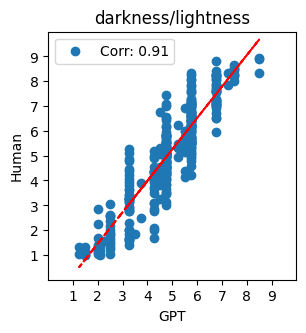

In [17]:
# Define the column names for the human data
human_data_columns = ['subtype', 'token within subtype', 'darkness/lightness', 'fine/coarse grain',
                      'smooth/rough', 'dull/shiny', 'disorganized/organized', 'chromaticity', 'red/green']

# Load the human data from an Excel file
human_data = load_and_preprocess_human_data(
    filepath="Data/rocknorm3607_dat_catnumbered.xlsx",
    columns=human_data_columns,
    image_naming_func=create_image_filename,
    usecols=[i for i in range(9)]  # Specify the columns to use from the Excel file
)

# Define the specific GPT columns to include
gpt_columns = ['Image', 'darkness/lightness', 'fine/coarse grain', 'smooth/rough', 
               'dull/shiny', 'disorganized/organized', 'chromaticity', 'red/green']

# Specify the list of GPT data files
gpt_files = [
    'model_lightness_no_anchors.csv'#, 'model_grain_size_no_anchors.csv', 'model_roughness_no_anchors.csv',
    #'model_shininess_no_anchors.csv', 'model_organization_no_anchors.csv', 'model_chromaticity_no_anchors.csv',
    #'model_red_green_no_anchors.csv'
]

# Load and combine the GPT data from multiple CSV files
save_directory = 'gpt4o_data_no_anchors_RGB/'
gpt_data = load_gpt_data(gpt_files, gpt_columns, save_directory)

# Intersect the human and GPT data based on the 'Image' column, then save the intersected data
intersect_and_save_data(
    human_data=human_data,
    gpt_data=gpt_data,
    human_save_path='human_continuous_combined.csv',
    gpt_save_path='gpt4o_data_no_anchors_RGB/model_continuous_no_anchors_combined.csv'
)

# Plot the correlations between the saved datasets
plot_correlations(
    csv_path_1='gpt4o_data_no_anchors_RGB/model_continuous_no_anchors_combined.csv',
    csv_path_2='human_continuous_combined.csv'
)

## supplementary dimensions

{'porphyritic texture', 'Image'}


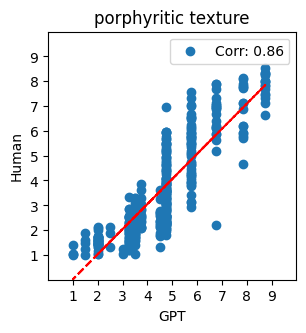

In [18]:
# Define the columns for human data
human_data_columns = ['rock number', 'subtype', 'token within subtype', 'porphyritic texture', 
                      'presence of holes', 'green hue', 'pegmatitic structure', 'conchoidal fracture']


# Load human data
human_data = load_and_preprocess_human_data(
    filepath="Data/supp540.txt",
    columns=human_data_columns,
    image_naming_func=create_image_filename
)

# Define GPT files and the corresponding columns after 'Image'
gpt_files = [
    'model_porphyritic_no_anchors.csv',
    #'model_pegmatitic_no_anchors.csv',
    #'model_conchoidal_no_anchors.csv'
]
gpt_columns = [
    'Image', 
    'porphyritic texture', 
    #'pegmatitic structure', 
    #'conchoidal fracture'
    ]

# Load and process GPT data
save_directory = 'gpt4o_data_no_anchors_RGB/'
gpt_data = load_gpt_data(gpt_files, gpt_columns, save_directory)

# Intersect and save the processed data
intersect_and_save_data(
    human_data=human_data,
    gpt_data=gpt_data,
    human_save_path='human_supplementary_combined.csv',
    gpt_save_path='gpt4o_data_no_anchors_RGB/model_supplementary_no_anchors_combined.csv'
)

# Plot correlations
plot_correlations(
    csv_path_1='gpt4o_data_no_anchors_RGB/model_supplementary_no_anchors_combined.csv',
    csv_path_2='human_supplementary_combined.csv'
)


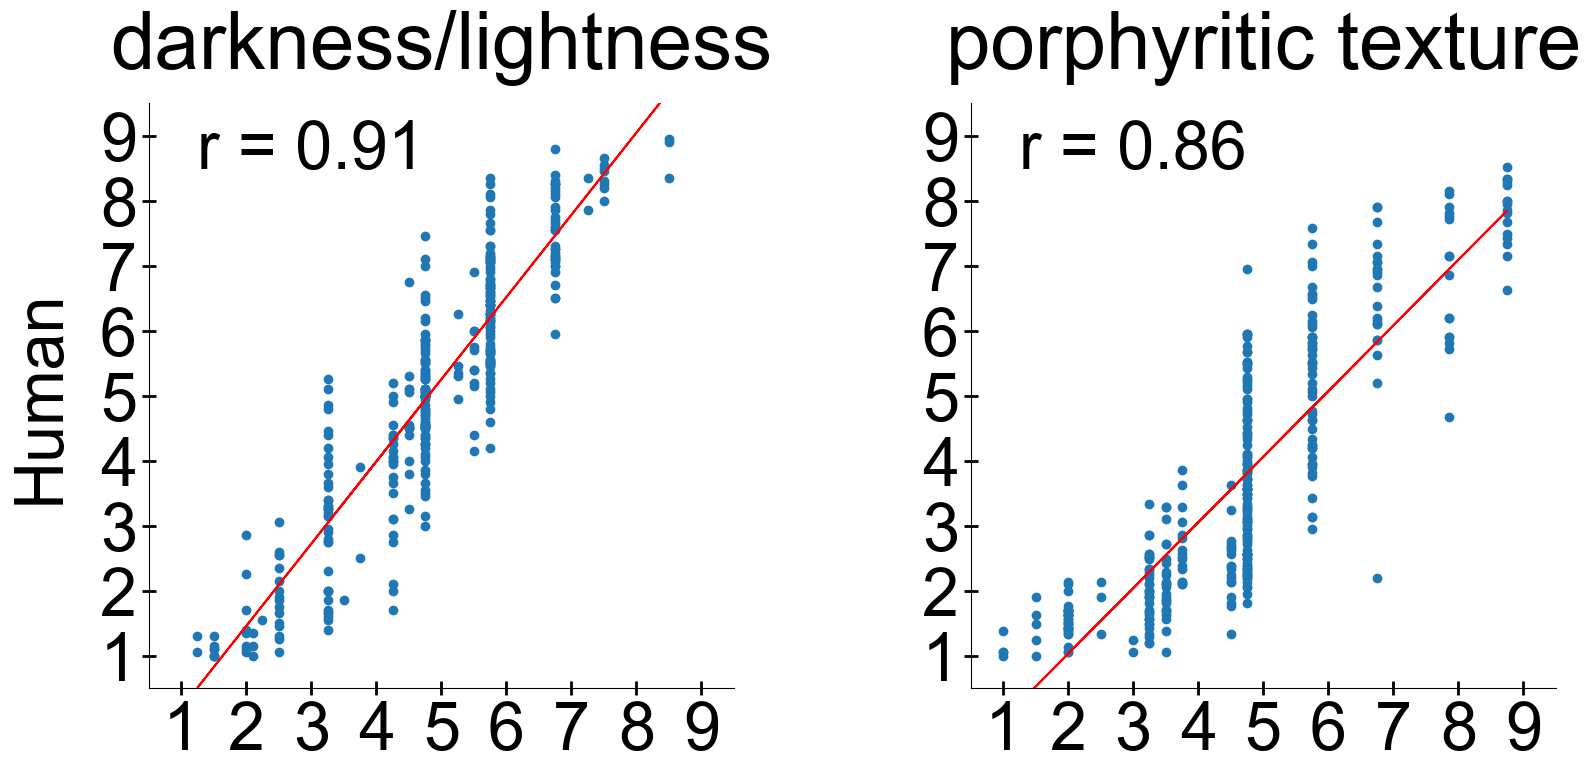

In [19]:
def plot_correlations(csv_path_pairs):
    # Set the font properties
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 48  # You can also set the font size here

    # Define the fixed dimensions for a 2x5 grid
    num_rows = 2
    num_cols = 5
    horizontal_spacing = 0.4  # Adjust horizontal spacing here
    vertical_spacing = 0.5    # Adjust vertical spacing here

    # Create a large figure to hold all subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*10, num_rows*9.5))
    
    # Adjust subplot layout
    plt.subplots_adjust(wspace=horizontal_spacing, hspace=vertical_spacing)
    
    # Adjust for when there's a single subplot
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
        
    axes_flat = axes.flatten()
    plot_index = 0
    
    # Fixed ticks
    ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9]

    # Iterate over each pair of CSV files
    for csv_path_1, csv_path_2 in csv_path_pairs:
        df1 = pd.read_csv(csv_path_1)
        df2 = pd.read_csv(csv_path_2)
        
        # Identify common columns, excluding 'Image'
        common_columns = sorted(list(set(df1.columns).intersection(df2.columns) - {'Image'}))
        
        # Filter DataFrames to these columns
        df1_filtered = df1[common_columns].astype(float)
        df2_filtered = df2[common_columns].astype(float)
        
        # Plot each feature in its own subplot
        for feature in common_columns:
            if plot_index >= len(axes_flat):
                break  # Stop if there are more features than subplot spaces

            x = df1_filtered[feature].values
            y = df2_filtered[feature].values
            correlation, _ = pearsonr(x, y)
            ax = axes_flat[plot_index]
            ax.scatter(x, y)
            ax.set_title(feature, pad=25)

            # Set axis limits and ticks
            ax.set_xlim(0.5, 9.5)
            ax.set_ylim(0.5, 9.5)
            ax.set_aspect('equal')
            ax.set_xticks(ticks)
            ax.set_yticks(ticks)

            ax.tick_params(axis='both', which='major', direction='inout', length=10, width=2)


            # Modify spines to remove the top and right box borders
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            # Fit line
            m, b = np.polyfit(x, y, 1)
            ax.plot(x, m*x + b, 'r-')
            ax.text(1.25, 8.5, f'r = {correlation:.2f}', fontsize=48, color='black')

            # Conditional label setting for Y-axis
            if plot_index % num_cols == 0:  # For plots on the left side in each row
                ax.set_ylabel('Human', labelpad=20)
            else:
                ax.set_ylabel('')

            # Conditional label setting for X-axis
            if plot_index >= num_cols * (num_rows - 1):  # For all plots in the last row
                ax.set_xlabel('GPT', labelpad=20)
            else:
                ax.set_xlabel('')

            plot_index += 1
    
    # Hide unused subplots
    for k in range(plot_index, len(axes_flat)):
        axes_flat[k].set_visible(False)

    plt.savefig('correlation_plots_gpt4o_cond1.png', bbox_inches='tight', pad_inches=0.1)
    plt.show()

csv_path_pairs = [
    ('gpt4o_data_no_anchors_RGB/model_continuous_no_anchors_combined.csv', 'human_continuous_combined.csv'),
    ('gpt4o_data_no_anchors_RGB/model_supplementary_no_anchors_combined.csv', 'human_supplementary_combined.csv')
]

# Plot all correlations in a 2x5 grid
plot_correlations(csv_path_pairs)
